In [4]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Challenge: Iterate and Evaluate Your Classifier

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data_path = ('sentiments/amazon_cells_labelled.txt')
df = pd.read_csv(data_path, delimiter= '\t', header=None)
df.columns = ['text', 'Positive']

df.head()

,text,Positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [2]:
from collections import Counter
import re

common_words = ['a', 'about', 'am', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'can', 'did', 'do', 'does', 'for', 'from', 'had', 'has', 'have', 'having', 'i', "i'm", "i've", 'in', 'is', 'it', "it's", 'its', 'me', 'my', 'of', 'on', 'or', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'this', 'to', 'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'will', 'with', 'within', 'you', 'your']
domain_specific_words = ['amazon', 'audio', 'batteries', 'battery', 'bluetooth', 'buttons', 'camera', 'car', 'cars', 'charger', 'device', 'ear', 'ears', 'earset', 'headphones', 'headset', 'jabra', 'jawbone', 'motorola', 'nokia', 'phone', 'plug', 'samsung', 'software', 'sound', 'verizon']
all_words = []
for row in df.iterrows():
    sentence = row[1]['text'].lower()
    sentence = re.sub("[^a-zA-Z' ]+", '', sentence)
    words = sentence.split()
    for word in words:
        if len(word) > 0 and word not in common_words and word not in domain_specific_words:
            all_words.append(word)

counts = Counter(all_words)
keywords = [k for k, v in counts.items() if v > 15]

## Iteration 1

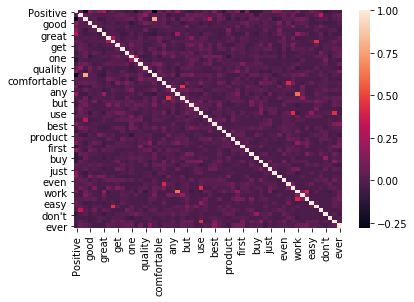

BASELINE: 79.0% accuracy
Tried removing "so": -0.2% in accuracy
Tried removing "no": -0.5% in accuracy
Tried removing "good": -0.9% in accuracy
Tried removing "case": -0.1% in accuracy
Tried removing "excellent": -1.0% in accuracy
Tried removing "great": -3.3% in accuracy
Tried removing "more": 0.0% in accuracy
Tried removing "than": -0.5% in accuracy
Tried removing "get": 0.0% in accuracy
Tried removing "up": -0.2% in accuracy
Tried removing "if": -0.5% in accuracy
Tried removing "one": -0.3% in accuracy
Tried removing "money": -0.2% in accuracy
Tried removing "time": 0.0% in accuracy
Tried removing "quality": 0.7% in accuracy
Tried removing "very": -0.9% in accuracy
Tried removing "not": -0.1% in accuracy
Tried removing "comfortable": -0.4% in accuracy
Tried removing "all": 0.0% in accuracy
Tried removing "recommend": -0.6% in accuracy
Tried removing "any": 0.0% in accuracy
Tried removing "works": 0.1% in accuracy
Tried removing "would": 0.0% in accuracy
Tried removing "but": -0.2% i

81.0

In [3]:
for key in keywords:
    df[str(key)] = df.text.str.contains(str(key), case=False)

sns.heatmap(df.corr())
plt.show()

data = df[keywords]
target = df['Positive']

bnb = BernoulliNB()
bnb.fit(data, target)

my_predictions = bnb.predict(data)
baseline = ((target == my_predictions).sum()/data.shape[0]) * 100
print('BASELINE: {}% accuracy'.format(baseline))

def train_on_original_data(keywords):
    for key in keywords:
        df[str(key)] = df.text.str.contains(str(key), case=False)

    data = df[keywords]
    target = df['Positive']

    bnb = BernoulliNB()
    bnb.fit(data, target)

    my_predictions = bnb.predict(data)
    return ((target == my_predictions).sum()/data.shape[0]) * 100

def backwards_pass(keywords):
    answer_key = {}
    for keyword in keywords:
        test_keywords = list(keywords)
        test_keywords.remove(keyword)
        percentage = train_on_original_data(test_keywords)
        answer_key[keyword] = percentage
        print('Tried removing "{}": {}% in accuracy'.format(keyword, round(percentage - baseline, 2)))
    
    min_key = max(answer_key, key=answer_key.get)
    answer_key.pop(min_key, None)
    remaining_keywords = list(answer_key.keys())
    
    print('***** REMOVED "{}" \n\n\n'.format(min_key));
    return list(remaining_keywords)

new_keywords = backwards_pass(keywords)

for _ in range(5):
    new_keywords = backwards_pass(new_keywords)

train_on_original_data(new_keywords)

## Iteration 2

## Iteration 3

## Iteration 4

## Iteration 5

## Conclusion